In [1]:
#importing libraries
import os
import pandas as pd
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# reading a csv file using pandas
df1 = pd.read_csv("C:/Users/USER/Downloads/GoldSilver.csv")
 # displaying the first 5 rows of the dataset
df1.head()

,Unnamed: 0,gold,silver
0,1977-12-30,100.0,223.42
1,1978-01-02,100.0,223.42
2,1978-01-03,100.0,229.84
3,1978-01-04,100.0,224.58
4,1978-01-05,100.0,227.99


In [3]:
 # Use the shape attribute to see the rows and columns dimension - Axis = 0| = 1
df1.shape

(9132, 3)

In [4]:
# information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9132 entries, 0 to 9131
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9132 non-null   object 
 1   gold        9132 non-null   float64
 2   silver      9132 non-null   float64
dtypes: float64(2), object(1)
memory usage: 214.2+ KB


In [5]:
# Using the columns attribute to check column names
df1.columns

Index(['Unnamed: 0', 'gold', 'silver'], dtype='object')

In [6]:
#Renaming one of the columns
df1 = df1.rename(columns={"Unnamed: 0":"date"})
df1.head()

,date,gold,silver
0,1977-12-30,100.0,223.42
1,1978-01-02,100.0,223.42
2,1978-01-03,100.0,229.84
3,1978-01-04,100.0,224.58
4,1978-01-05,100.0,227.99


In [7]:
df1["date"] = pd.to_datetime(df1['date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9132 entries, 0 to 9131
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9132 non-null   datetime64[ns]
 1   gold    9132 non-null   float64       
 2   silver  9132 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 214.2 KB


In [8]:
df1.isna().sum()

date      0
gold      0
silver    0
dtype: int64

In [9]:
# Displaying the statistical summary of the DataFrame
df1.describe()

,gold,silver
count,9132.000000,9132.000000
mean,287.372537,376.653099
std,190.347732,291.828405
min,97.450000,137.300000
25%,186.380000,197.777500
50%,215.155000,255.360000
75%,268.372500,459.195000
max,1043.890000,1901.930000


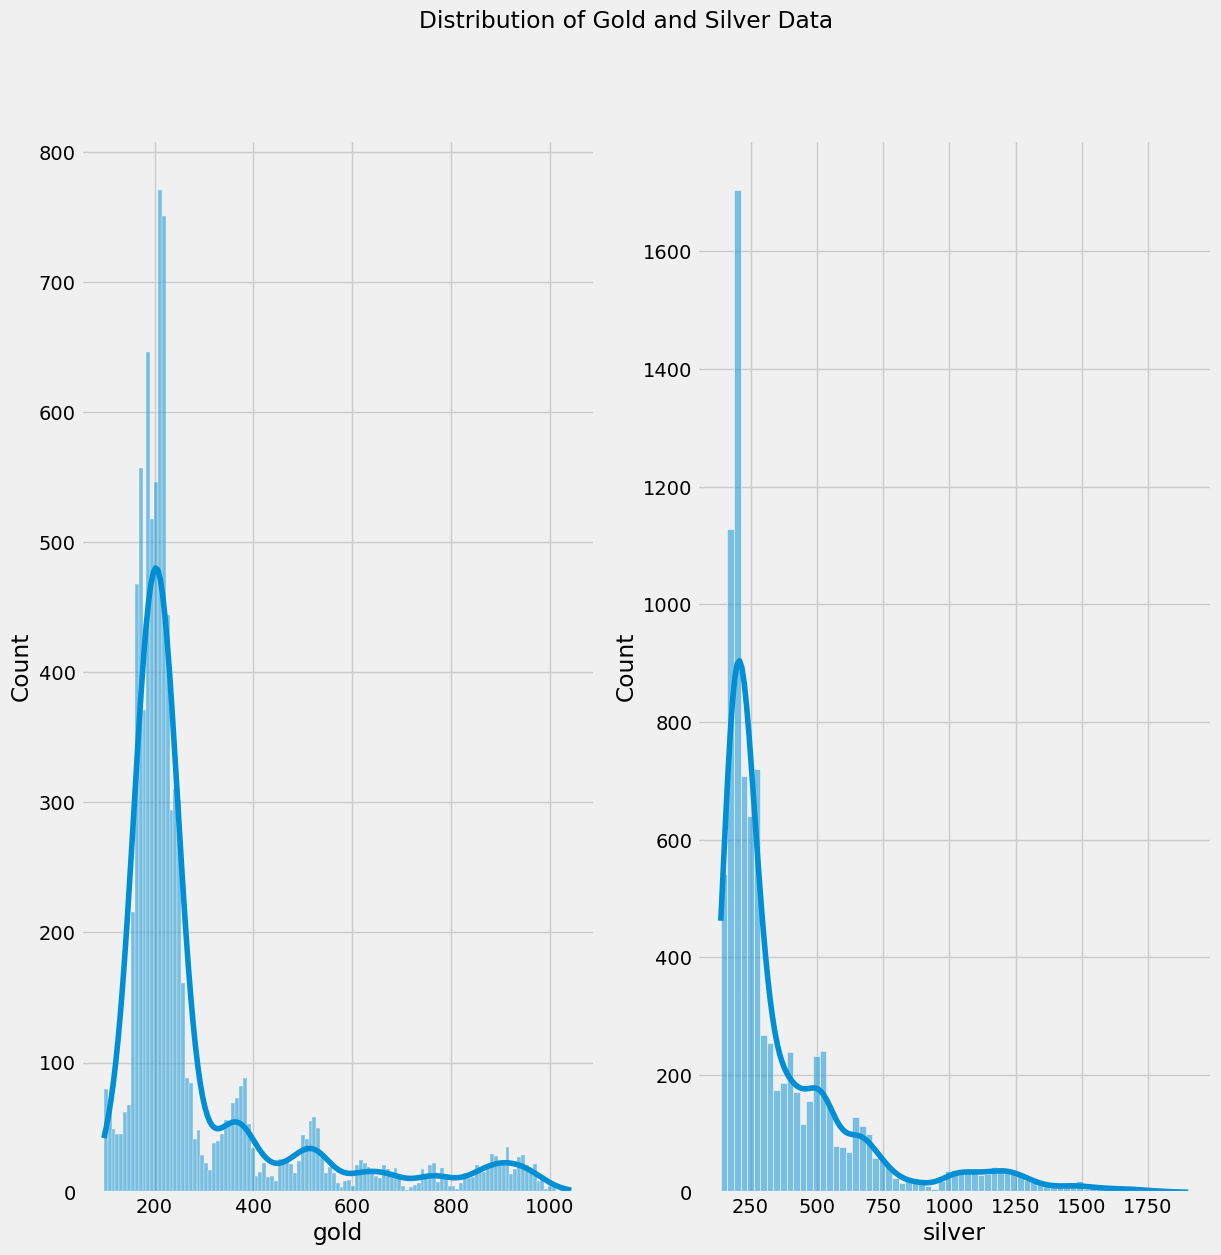

In [10]:
#Data distribution visualization
fig = plt.figure(figsize=(13, 13))

# suptitle of the graph
fig.suptitle('Distribution of Gold and Silver Data')
temp = df1.drop("date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(1, 2, i+1)
    sns.histplot(data=df1, x=item, kde=True)
plt.show()

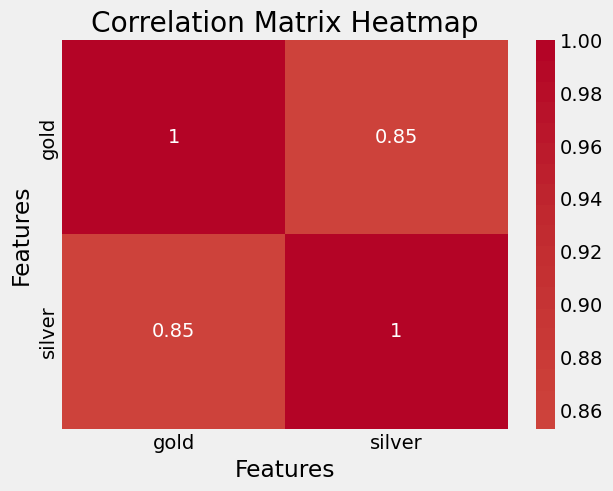

In [12]:
# Calculate correlation matrix
correlation  = df1.corr()
 
# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)
 
# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
 
# Show plot
plt.show()

In [13]:
print (correlation['gold'].sort_values(ascending=False),  '\n')

gold      1.000000
silver    0.852921
Name: gold, dtype: float64 



In [14]:
# visualizing the historical data of gold
fig = go.Figure([go.Scatter(x=df1['date'], y=df1['gold'])])

fig.update_layout(
    title={'text': "GOLD PRICE HISTORY DATA", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
    yaxis_title='Gold Price',
    xaxis_title='Date')

In [18]:
# apply rolling mean with window size of 3
df1["gold_trend"] = df1["gold"]\
   .rolling(window=20).mean()

df1["gold_trend"].loc[20:]

df1.head()

,date,gold,silver,gold_trend
0,1977-12-30,100.0,223.42,NaN
1,1978-01-02,100.0,223.42,NaN
2,1978-01-03,100.0,229.84,NaN
3,1978-01-04,100.0,224.58,NaN
4,1978-01-05,100.0,227.99,NaN


In [20]:
# visualising the rolling mean
fig = go.Figure([go.Scatter(x=df1['date'], y=df1['gold_trend'])])

fig.update_layout(
    title={'text': "TREND IN PRICE OF GOLD THROUGH DATE", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
    yaxis_title='Gold Price($)',
    xaxis_title='Date')

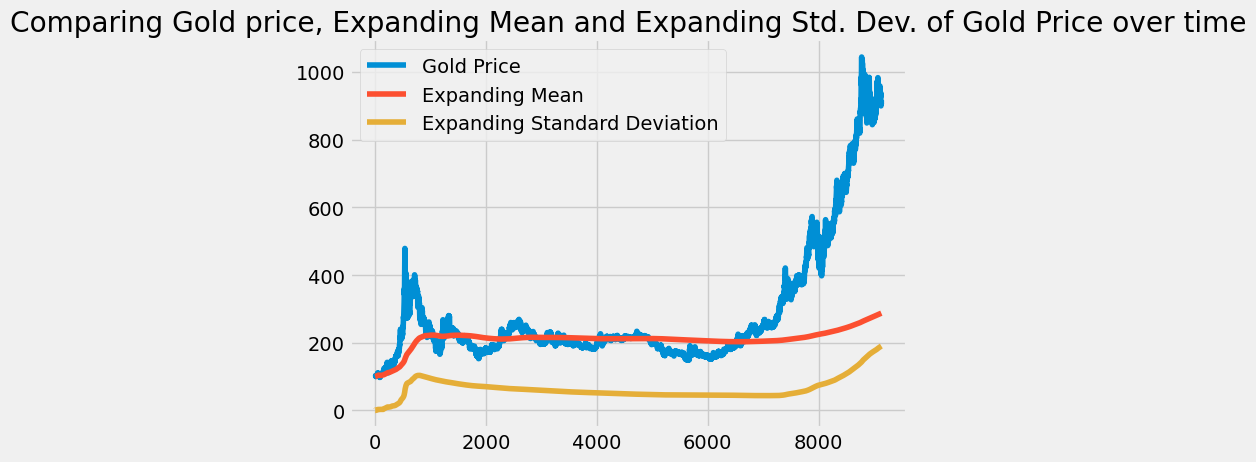

In [21]:
# Expanding window functions
gold_mean = df1.gold.expanding().mean()
gold_std = df1.gold.expanding().std()
df1.gold.plot()
gold_mean.plot()
gold_std.plot()
_ = plt.title('Comparing Gold price, Expanding Mean and Expanding Std. Dev. of Gold Price over time')
plt.legend(['Gold Price','Expanding Mean','Expanding Standard Deviation'])
plt.show()

In [22]:
# visualizing the historical data of silver
fig = go.Figure([go.Scatter(x=df1['date'], y=df1['silver'])])

fig.update_layout(
    title={'text': "SILVER PRICE HISTORY DATA", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
    yaxis_title='Silver Price',
    xaxis_title='Date')

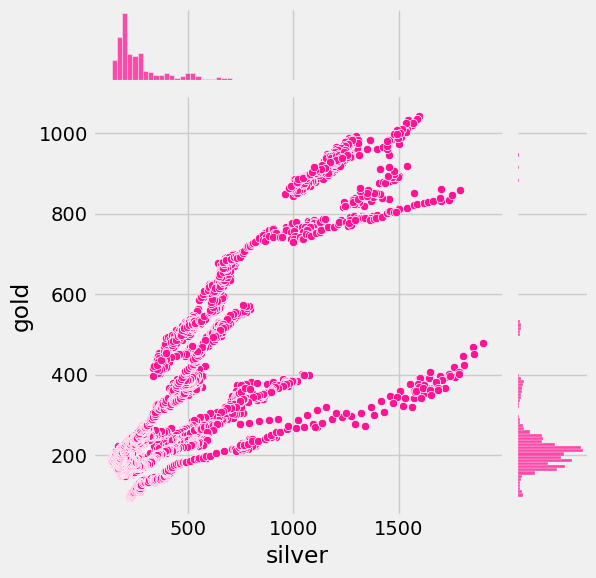

In [23]:
sns.jointplot(x =df1['silver'], y = df1['gold'], color = 'deeppink')